# Exercício 1 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9559575319290161, 9.194939027394966e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FirstMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -1.561772  2.209993 -1.716105
1 -1.431300  1.031951  0.329130
2  0.712044 -0.264969 -0.363290
3  1.944007 -1.517365 -0.339740
4  1.046032 -1.084490  1.068878


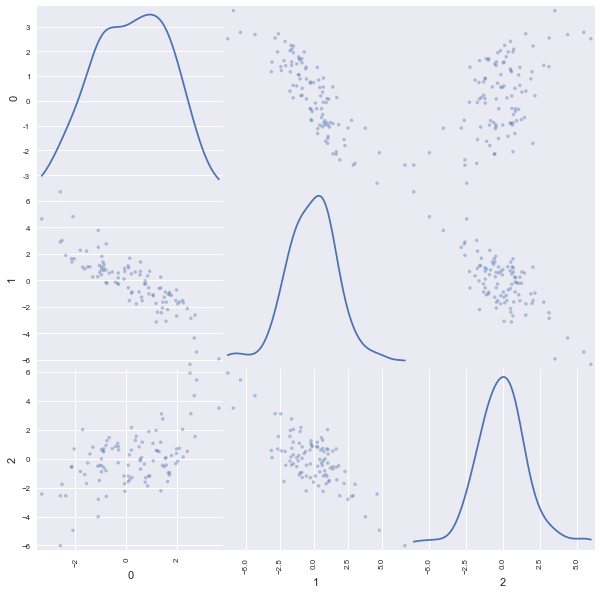

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0159,0.9857,0.35364
1,0.3059,0.3513,0.9682,0.016161
2,0.2729,0.2259,0.9614,0.0050693


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 20)

Execution time: 0.44999194145202637 seconds


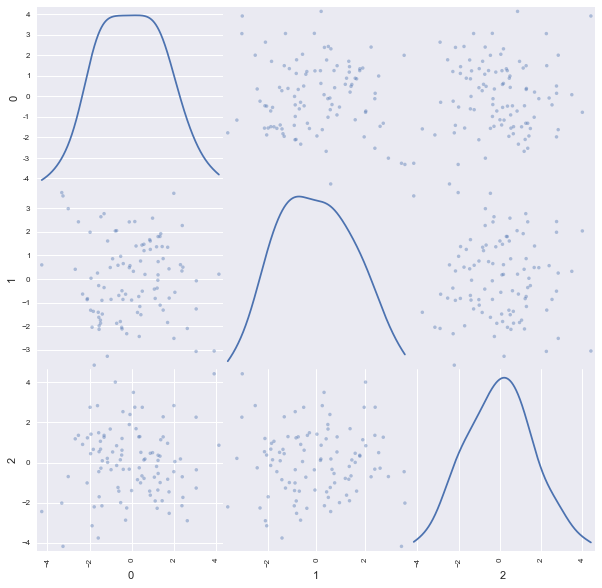

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0923,0.0656,0.9925,0.85302
1,0,0.0738,0.9865,0.40462
2,0.105,0.0826,0.9949,0.97317


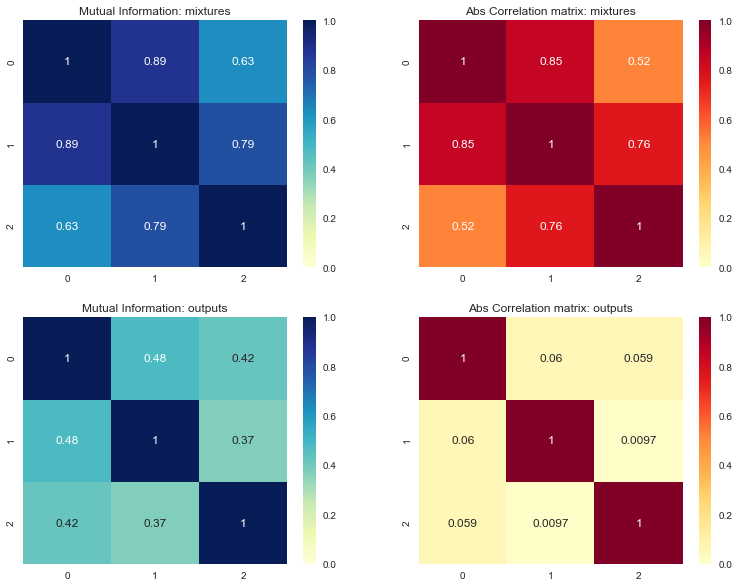

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1000) 

Execution time: 5.084545135498047 seconds


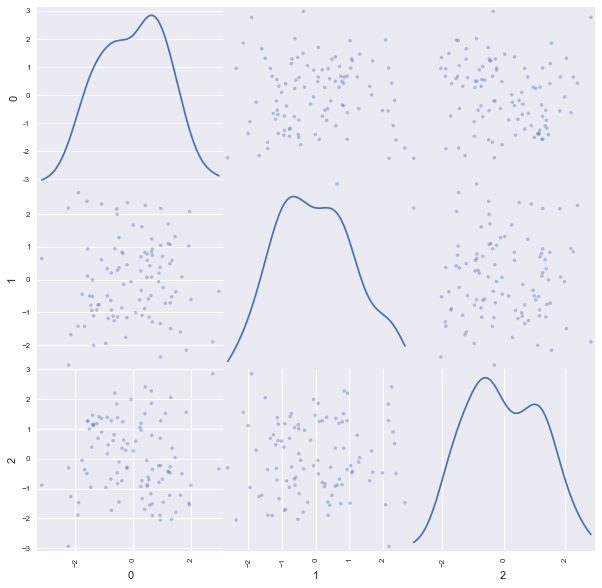

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.093,0.0898,0.9882,0.52047
1,0,0.0292,0.9815,0.17236
2,0,0.188,0.9792,0.11569


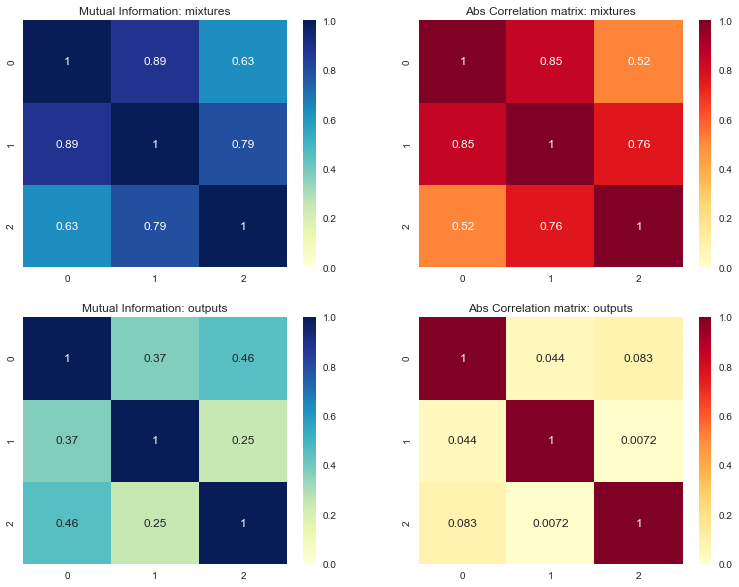

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-8, runs = 20)

Execution time: 0.08911871910095215 seconds


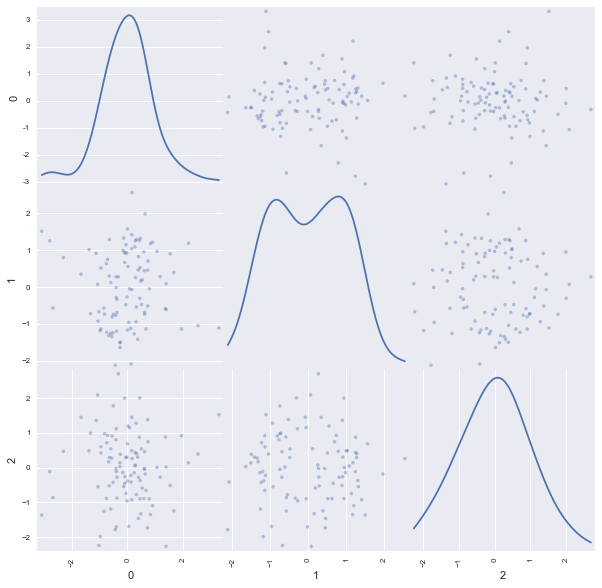

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1639,0.123,0.9613,0.00496
1,0,0.0588,0.9689,0.018293
2,0,0.1027,0.9952,0.98028


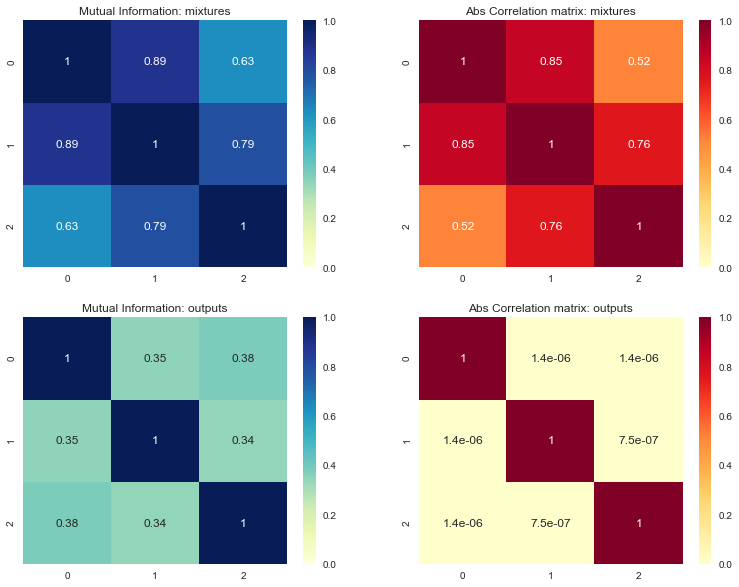

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

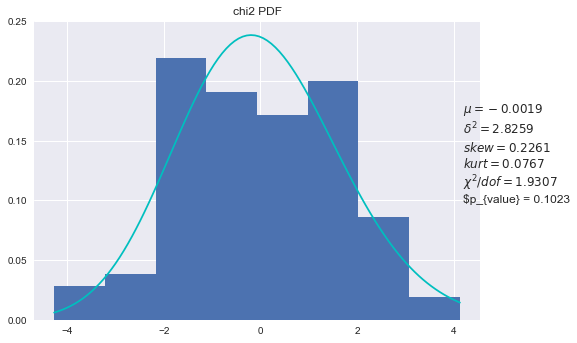

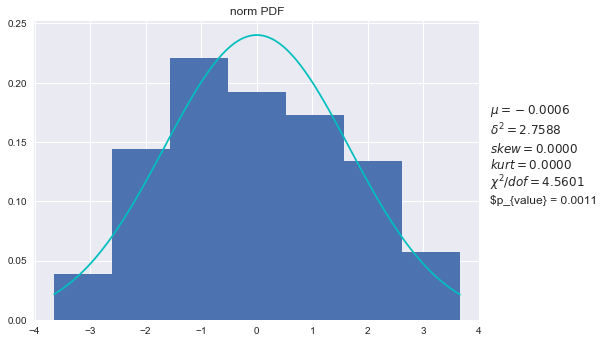

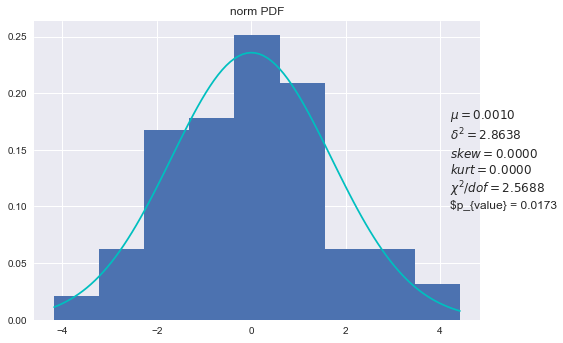

In [16]:
from evaluation import graph_fittedData
graph_fittedData(yNPCA[0])
graph_fittedData(yNPCA[1])
graph_fittedData(yNPCA[2])

## Chichocki-Unbehauen Algorithm Feedback network

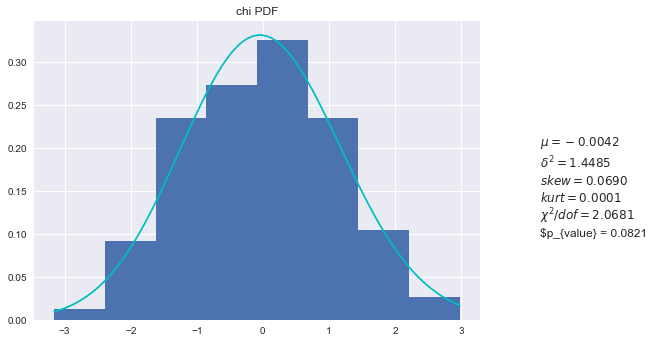

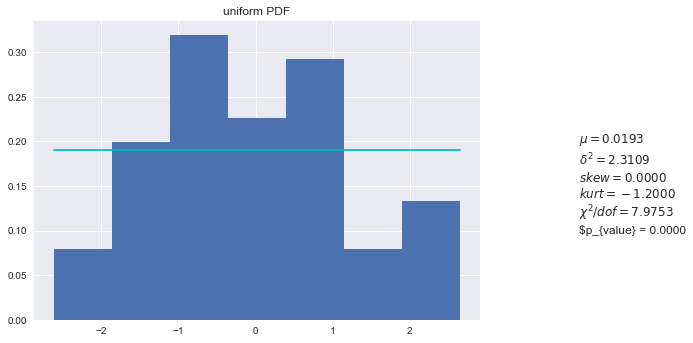

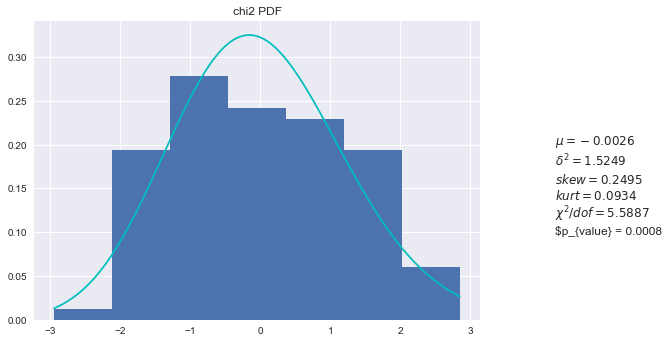

In [17]:
graph_fittedData(yFeedback[0])
graph_fittedData(yFeedback[1])
graph_fittedData(yFeedback[2])

## Chichocki-Unbehauen Algorithm Feedforward network

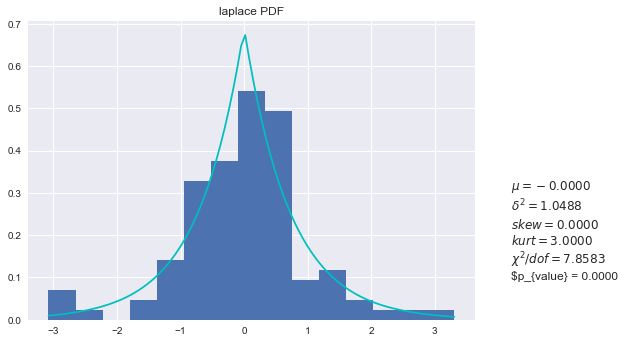

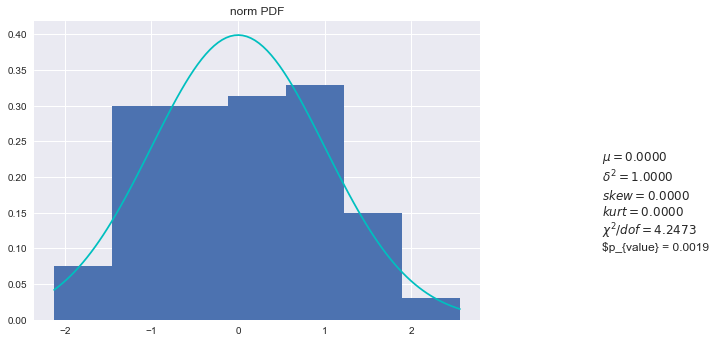

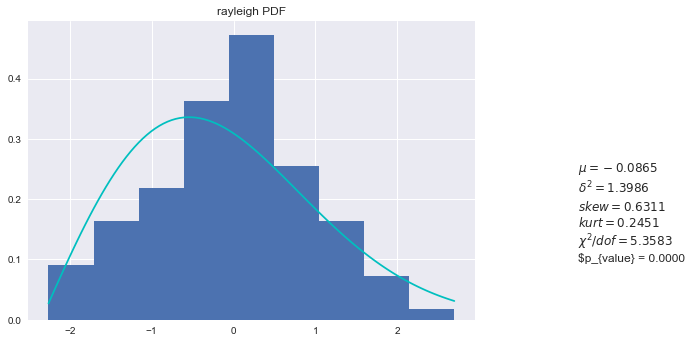

In [18]:
graph_fittedData(yFeedforward[0])
graph_fittedData(yFeedforward[1])
graph_fittedData(yFeedforward[2])

# Fontes conhecidas

In [19]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/FirstSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 100)


,0,1,2
0,-1.561772,2.209993,-1.716105
1,-1.431300,1.031951,0.329130
2,0.712044,-0.264969,-0.363290
3,1.944007,-1.517365,-0.339740
4,1.046032,-1.084490,1.068878


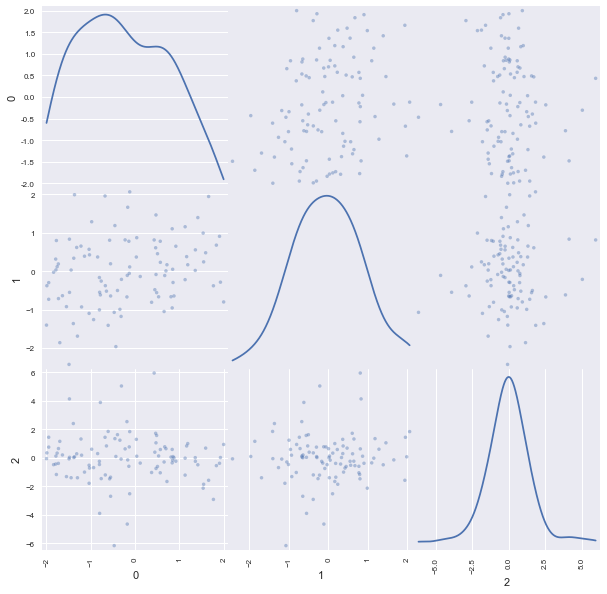

In [20]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(3, 100) (3, 100)
[[ 0.26017911  0.1580092   0.2968046 ]
 [ 0.06932505  0.04977324  0.0892619 ]
 [ 0.34328831  0.35929096  0.20161877]]


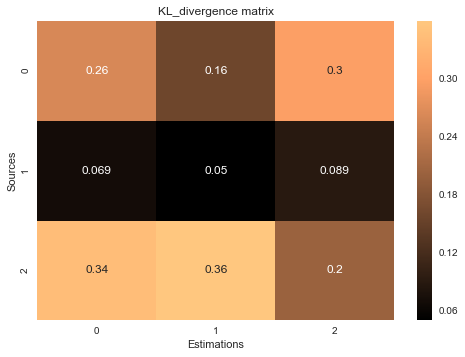

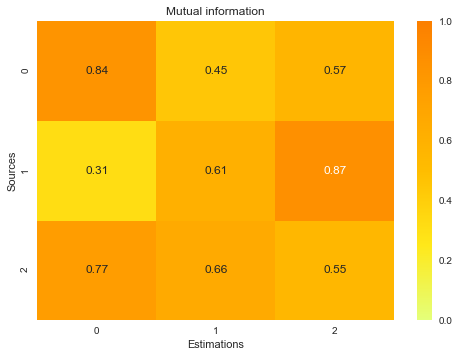

In [21]:
from evaluation   import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(3, 100) (3, 100)
[[ 0.28643112  0.12475582  0.3033881 ]
 [ 0.0379705   0.09773774  0.06809383]
 [ 0.23520679  0.40267346  0.37455312]]


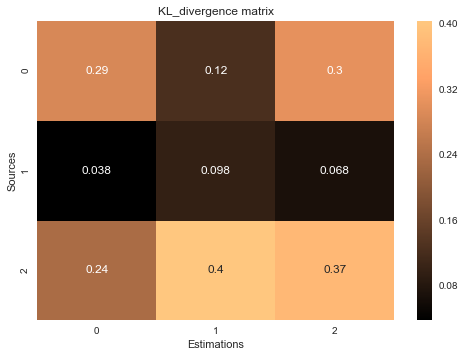

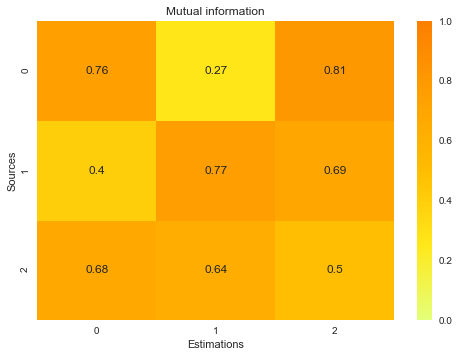

In [22]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(3, 100) (3, 100)
[[ 0.5078449   0.27092505  0.19506875]
 [ 0.17140543  0.10914839  0.12987185]
 [ 0.38347133  0.3421906   0.2529065 ]]


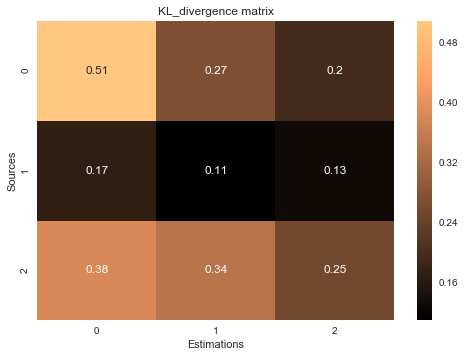

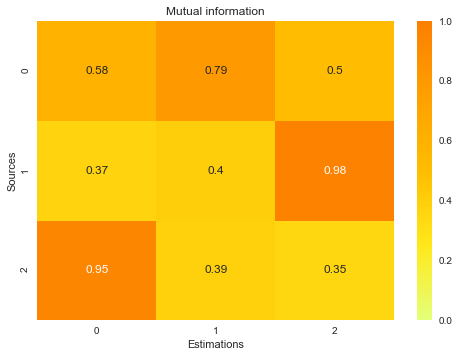

In [23]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)